In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Generate input data randomly (50 + and 50 -)


In [29]:
X1=np.concatenate((np.random.rand(1,50),np.random.rand(1,50),np.ones((1,50))))  # class '-1'
X2=np.concatenate((np.random.rand(1,50),2+np.random.rand(1,50),np.ones((1,50)))) # class '+1'
X=np.concatenate((X1,X2),axis=1)
X

array([[6.90941816e-01, 3.96678277e-01, 7.08662691e-02, 6.58934451e-01,
        2.66770903e-02, 6.36386603e-01, 3.05276429e-01, 7.38808572e-01,
        7.21391002e-01, 7.96073961e-01, 9.50423312e-01, 4.26284079e-01,
        7.95254741e-01, 5.22455477e-01, 8.69660499e-01, 1.46403880e-01,
        5.43415085e-02, 8.45135028e-01, 2.07393385e-03, 4.91637623e-01,
        9.11902795e-01, 8.33141043e-01, 3.70452413e-01, 3.90705464e-01,
        6.85053549e-01, 1.52459266e-01, 5.53068275e-01, 5.26044374e-01,
        3.33880870e-01, 4.80556066e-01, 1.37748694e-01, 5.13379975e-01,
        7.03018691e-01, 2.74890602e-01, 6.71136471e-01, 2.99756718e-01,
        6.70863678e-01, 1.20637521e-01, 7.49420020e-01, 6.72824031e-02,
        1.88132447e-01, 3.40221772e-01, 6.49379116e-02, 1.15076945e-01,
        2.26145758e-02, 5.20126959e-01, 1.67767129e-01, 8.72874159e-01,
        2.35159131e-01, 8.38096866e-02, 6.52681530e-01, 5.39385812e-02,
        7.48587134e-01, 4.97913369e-01, 2.84824573e-01, 7.688149

Output class [-1,+1]

In [30]:
Y=np.concatenate((-np.ones((50,)),np.ones((50,))));
Y

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

Initial weight vector - will be updated by the learning algorithm

In [31]:
w=np.array([.5,.5,.5])
w

array([0.5, 0.5, 0.5])

Call **perceptron learning algorithm**

In [35]:
def slperceptron(X,Y,w_init,iter):
  #a single layer perceptron learning algorithm
  #4 parameters: 
  #  X is the set of training instances
  #  Y is the set of class labels for the training instances
  #  w_init is an initial weight vector
  #  iter is the number of interations the algorithm will run for
  w = w_init
  print(X[:,1])
  for iteration in range(iter):  #<- in practice, use some stopping criterion!
    for ii in range(X.shape[1]): #cycle through training set
      if np.sign(np.dot(w,X[:,ii]))!=Y[ii]: #wrong decision?
          w = w + X[:,ii] * Y[ii]   #then add (or subtract) this point to w
  return w

In [36]:
wtag=slperceptron(X,Y,w,100);

[0.39667828 0.31701427 1.        ]


**Predict** classes

In [27]:
ytag=np.dot(wtag,X)
ytag

array([-0.89674034, -1.312555  , -1.23646745, -0.21574103, -0.76293895,
       -1.06196765, -0.48381586, -0.73674201, -1.12258794, -1.09692492,
       -0.34770527, -1.10448096, -0.60434698, -0.36414881, -0.13154771,
       -0.7212278 , -0.23804425, -0.97658156, -0.13011961, -0.37842258,
       -0.92043313, -1.02564374, -0.61657067, -0.3296432 , -0.86141546,
       -0.10495593, -0.2020956 , -1.07558783, -0.33196935, -1.18883764,
       -0.17690608, -0.71982333, -0.54606681, -0.81033951, -0.79668625,
       -0.49759658, -0.91564857, -1.25102519, -0.32594215, -1.34994443,
       -0.16193839, -0.90090076, -0.43388288, -0.1994237 , -1.20439672,
       -0.14026359, -0.11948513, -0.72531416, -0.1837226 , -1.40615932,
        2.01885473,  1.81311601,  2.23051658,  2.46240253,  1.62383738,
        1.40225161,  1.28354631,  1.95141865,  1.38822028,  1.23935835,
        1.46327874,  2.07205947,  2.50940881,  1.38277058,  1.49726104,
        1.24296577,  1.23051026,  2.11980596,  1.93933218,  1.38

**Calculate** number of incorrect predictions

In [25]:
errors = np.sum(np.sign(np.dot(wtag,X))!=Y)
print("errors %.2f"%errors)

errors 0.00


Plot predictions over original data

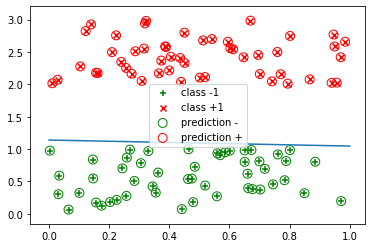

In [26]:
plt.scatter(X1[0,:],X1[1,:],c="g",marker="+",label="class -1")
plt.scatter(X2[0,:],X2[1,:],c="r",marker="x",label="class +1")

plt.scatter(X[0,ytag<0],X[1,ytag<0],s=80, facecolors='none', edgecolors='g',label="prediction -")
plt.scatter(X[0,ytag>0],X[1,ytag>0],s=80, facecolors='none', edgecolors='r',label="prediction +")

#show linear classification boundary
xcoord = np.array([0.0,1.0])
ycoord = (wtag[0]*xcoord + wtag[2])/-wtag[1];
plt.plot(xcoord,ycoord)
plt.legend()
plt.show()